<a href="https://colab.research.google.com/github/RebecaJmz/DIPLOMADO_CIENCIA_DE_DATOS/blob/main/002_TAREAS/006_Modelos_de_Clasificaci%C3%B3n_y_PCA/020_T_Modelos_de_clasificaci%C3%B3n_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MARTES 13 DE JUNIO DEL 2023

# ALGORITMOS DE CLASIFICACIÓN

# Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import tokenize
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

# Información y manipulación de los datos

In [ ]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [ ]:
nltk.download('punkt')                                                           # Descargar e instalar librería para el manejo del NLP
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df =df[['text', 'class']].rename(columns={'text':'contenido','class':'clasificacion'})

In [ ]:
df['categoria'] = df['clasificacion'].replace(['ham','spam'],[1,0])

In [ ]:
df.head()

,contenido,clasificacion,categoria
0,"Go until jurong point, crazy.. Available only ...",ham,1
1,Ok lar... Joking wif u oni...,ham,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,0
3,U dun say so early hor... U c already then say...,ham,1
4,"Nah I don't think he goes to usf, he lives aro...",ham,1


# **LIMPIEZA DE LOS DATOS**

In [ ]:
def tratamiento(texto):                                                          # Función para limpiar la base de datos

    texto=texto.lower()
    texto=nltk.word_tokenize(texto)

    temp=[]
    for i in texto:
        if i.isalnum():
            temp.append(i)

    texto=temp[:]
    temp.clear()

    for i in texto:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)

    texto=temp[:]
    temp.clear()

    for i in texto:
        temp.append(ps.stem(i))

    return " ".join(temp)

In [ ]:
df['tratamiento_1']= df['contenido'].apply(tratamiento)
df.head()

,contenido,clasificacion,categoria,tratamiento_1
0,"Go until jurong point, crazy.. Available only ...",ham,1,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ham,1,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,0,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,ham,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",ham,1,nah think goe usf live around though


In [ ]:
%matplotlib inline

In [ ]:
palabras = ' '.join([palabras for palabras in df['tratamiento_1']])

In [ ]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')

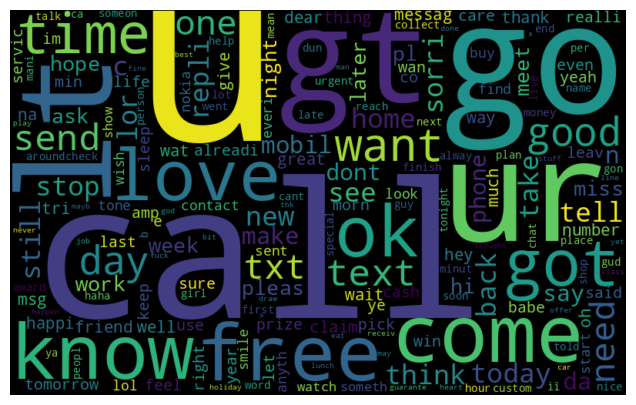

In [ ]:
wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
plot_cloud(wordcloud)

In [ ]:
df_positivo = df.query("clasificacion == 'ham'")                                 # Palabras catalogadas como HAM


In [ ]:
df_negativo = df.query("clasificacion == 'spam'")                                # Palabras catalogadas como SPAM


In [ ]:
def plot_cloud_neg(df):
  df_negativo = df.query("clasificacion == 'spam'")
  palabras = ' '.join([palabras for palabras in df_negativo['tratamiento_1']])
  wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')

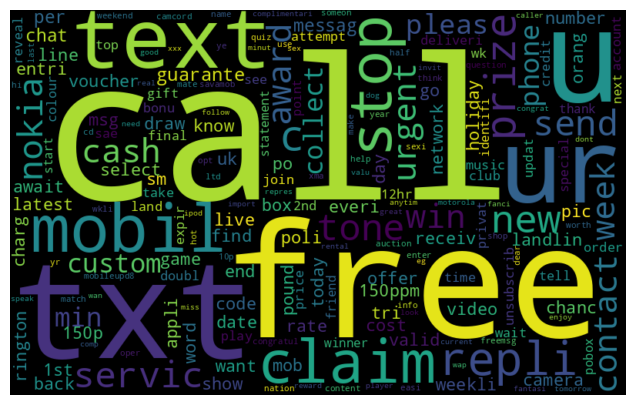

In [ ]:
plot_cloud_neg(df)

In [ ]:
def plot_cloud_pos(df):
  df_positivo = df.query("clasificacion == 'ham'")
  palabras = ' '.join([palabras for palabras in df_positivo['tratamiento_1']])
  wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')

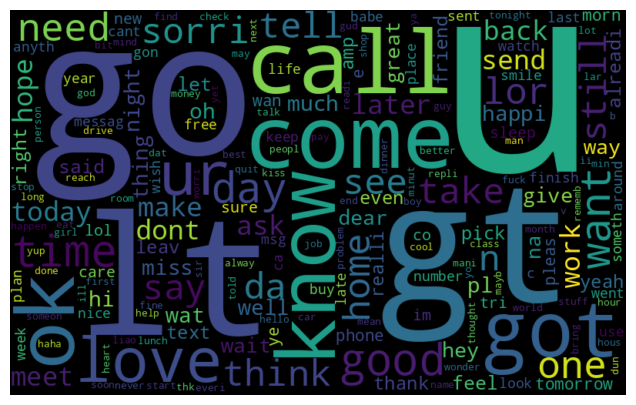

In [ ]:
plot_cloud_pos(df)

In [ ]:
token_espacio = tokenize.WhitespaceTokenizer()                                   # Generamos bolsa diccionario
frase_sep = token_espacio.tokenize(palabras)
frecuencia = nltk.FreqDist(frase_sep)

In [ ]:
df_frecuencia = pd.DataFrame({'palabra':list(frecuencia.keys()), 'frecuencia':list(frecuencia.values())})

In [ ]:
df_frecuencia.head()

,palabra,frecuencia
0,go,451
1,jurong,1
2,point,33
3,crazi,14
4,avail,17


[Text(0, 0.5, 'conteo')]

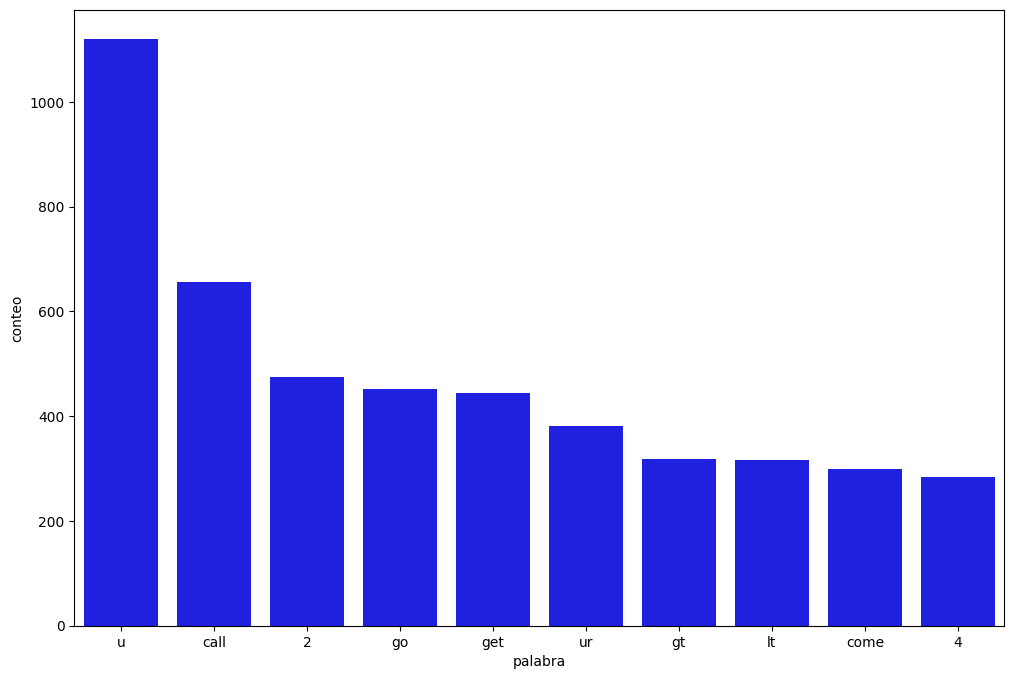

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_frecuencia.nlargest(columns='frecuencia', n=10), x='palabra', y='frecuencia', color='blue')
ax.set(ylabel='conteo')

In [ ]:
vectorizar = CountVectorizer(lowercase=True)
diccionario = vectorizar.fit_transform(df.tratamiento_1)
print(diccionario.shape)

(5572, 6708)


# **MODELOS**

In [ ]:
def plot_confusion_matrix(cm, labels):
    fig_cm = px.imshow(cm, labels=dict(x="Predicted", y="Actual", color="Count"),
                       x=labels, y=labels, color_continuous_scale='Viridis', text_auto = True,
                       title="Confusion Matrix")
    fig_cm.update_layout(coloraxis_showscale=False)
    fig_cm.show()

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(diccionario, df.categoria, random_state =20)

**SVM**

In [ ]:
SVM_MS =SVC()

In [ ]:
SVM_MS.fit(x_train, y_train)

SVC()

In [ ]:
SVM_MS_y_pred = SVM_MS.predict(x_test)
SVM_MS_y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
svm_report = classification_report(y_test, SVM_MS_y_pred)
print("SVM Classification Report:")
print(svm_report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       189
           1       0.97      1.00      0.99      1204

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
svm_cm = confusion_matrix(y_test, SVM_MS_y_pred)
plot_confusion_matrix(svm_cm, ['HAM', 'SPAM'])

**REGRESION LOGISTICA**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr_pred = lr.predict(x_test)

In [ ]:
lr_report = classification_report(y_test, lr_pred)
print("Logistic Regression Classification Report:")
print(lr_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       189
           1       0.98      1.00      0.99      1204

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
lr_cm = confusion_matrix(y_test, lr_pred)
plot_confusion_matrix(lr_cm, ['HAM', 'SPAM'])

# **Naive Bayes**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(x_test)

In [ ]:
knn_report = classification_report(y_test, knn_pred)
print("KNN Classification Report:")
print(knn_report)

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.34      0.51       189
           1       0.91      1.00      0.95      1204

    accuracy                           0.91      1393
   macro avg       0.95      0.67      0.73      1393
weighted avg       0.92      0.91      0.89      1393



In [ ]:
knn_cm = confusion_matrix(y_test, knn_pred)
plot_confusion_matrix(knn_cm, ['HAM', 'SPAM'])